In [21]:
import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections
from collections import defaultdict

In [2]:
# Read the text file
with open('acm.txt', 'r') as file:
    content = file.readlines()

# Extract the first 100 indexes
indexes = content[:100]

# Create a DataFrame
df = pd.DataFrame(indexes, columns=['Index'])

# Remove leading/trailing whitespaces and newlines
df['Index'] = df['Index'].str.strip()

# Print the DataFrame
print(df)


                                                Index
0   #*MOSFET table look-up models for circuit simu...
1                                              #t1984
2                     #cIntegration, the VLSI Journal
3                                             #index1
4                                                    
..                                                ...
95                        #cComputability with Pascal
96                                           #index13
97                                                   
98  #*Ambiguity and decision problems concerning n...
99                    #@Karel Culik, II, Arto Salomaa

[100 rows x 1 columns]


- A. Compute the number of distinct authors, publication venues, publications, and citations/references

- B. Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases” – what do you notice?

- C. For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)

- D. Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.

- E. Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?

- F. Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?

- G. Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results

- H. What is the venue with the highest apparent impact factor? Do you believe this number?(http://mdanderson.libanswers.com/faq/26159)

- I. Now repeat the calculation from item G, but restrict the calculation to venues with at least 10 publications. How does your histogram change? List the citation counts for all publications from the venue with the highest impact factor. How does the impact factor (mean number of citations) compare to the median number of citations?

- J. Finally, construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.

In [3]:
# A

authors = set()
venues = set()
publications = set()
citations = set()
index = ""

with open("./acm.txt", 'r+', newline='', encoding="utf8") as file:
    for line in file:        
        if line.startswith("#index"):
            index = line[7:]
            publications.add(line)        
        elif line.startswith("#@"):            
            for auth in line[3:].split(";"):
                 authors.add(auth.strip())
        elif line.startswith("#c"):
            venues.add(line)
        elif line.startswith("#%"):                            
            citations.add(index+line)


print("Total number of Distinct Authors:" , len(authors))
print("Total number of Venues:" , len(venues))
print("Total number of Publications:" , len(publications))
print("Total number of Citations/Referenes:" , len(citations))

Total number of Distinct Authors :- 1662167
Total number of Venues:- 273329
Total number of Publications:- 2385057
Total number of Citations/Referenes:- 9437851


In [4]:
# B

venue_set = set()

with open("./acm.txt",'r', newline='', encoding="utf8") as apfile:       
    index = ""
    venue = ""
    for row in apfile:
        if row.startswith("#c"):
            if "Principles and Practice of Knowledge Discovery in Databases" in row:
                venue = row[3:]
                venue_set.add(venue)

print("Venues lists are ")
for venue in venue_set:            
    print(venue)

Venues lists are 
KDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases

nowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)

nowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)

KDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases

KDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases



### B Answer

For the same conference, it seems the venues have different names, but a diff publication doesn't have the same same. This will increase the venue count incorrectly. 

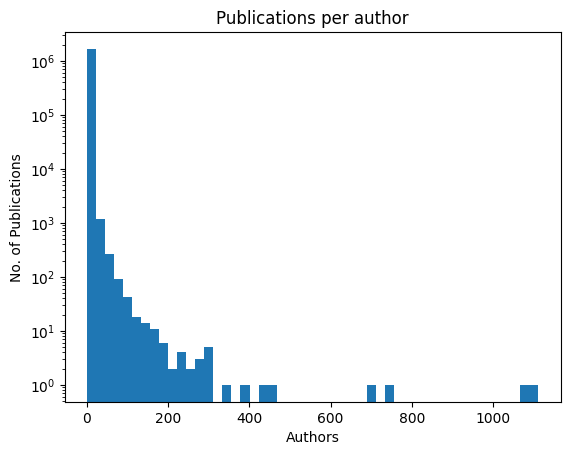

In [7]:
# C

author_publs = {}
# We will consider each Citation as one.
with open("./acm.txt","r",newline = "",encoding="utf8") as infile:
        for line in infile:
            if line.startswith("#@"):
                for auth in line[3:].split(";"):
                    if author_publs.get(auth.strip()) == None:
                        author_publs[auth.strip()] = 1
                    else:
                        author_publs[auth.strip()]  += 1
                    
authors = list(author_publs.keys())
publications = list(author_publs.values())

# remove values for null author and respective publication counts
index = authors.index("")
del authors[index]
del publications[index]

plt.xlabel('Authors')
plt.ylabel('No. of Publications')
plt.title('Publications per author')
plt.hist(publications,bins=50,log=True)
plt.show()

In [9]:
# D
print("Mean:",np.mean(publications))
print("Standard Deviation:",np.std(publications))
print("1st Quartile:",np.percentile(publications,25))
print("Median:",np.percentile(publications,50))
print("3rd Quartile:",np.percentile(publications,75))


Mean: 1.343925335977273
Standard Deviation: 2.590152672721417
1st Quartile: 1.0
Median: 1.0
3rd Quartile: 1.0


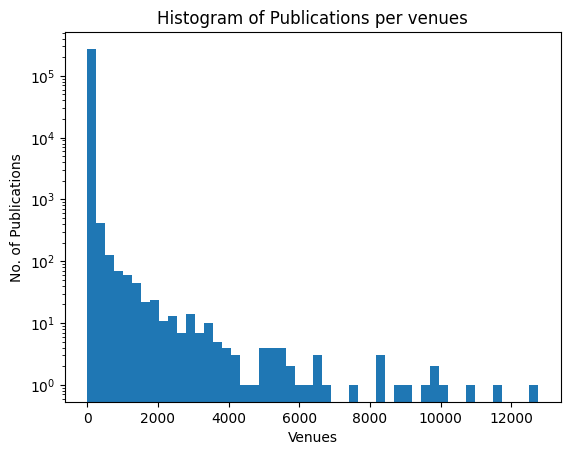

In [10]:
# E

venues_pubs = {}
with open("./acm.txt","r",newline = "",encoding="utf8") as infile:
        for line in infile:
            if line.startswith("#c"):
                if venues_pubs.get(line[3:]) == None:
                    venues_pubs[line[3:]] = 1
                else:
                    venues_pubs[line[3:]]  += 1
                    
venues = list(venues_pubs.keys())
v_publications = list(venues_pubs.values())

plt.xlabel('Venues')
plt.ylabel('No. of Publications')
plt.title('Histogram of Publications per venues')
plt.hist(v_publications,bins=50,log = True)
plt.show()

In [13]:
# Find the venue with largest number of publications in the dataset
print("Venue with largest no. of publications:",venues[list(venues_pubs.values()).index(max(venues_pubs.values()))])

Venue with largest no. of publications: EEE Transactions on Information Theory



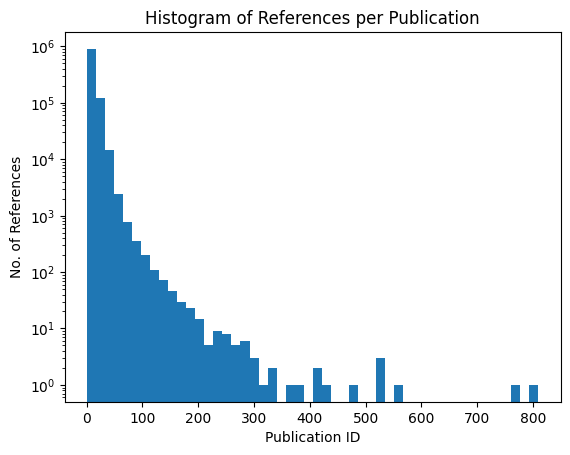

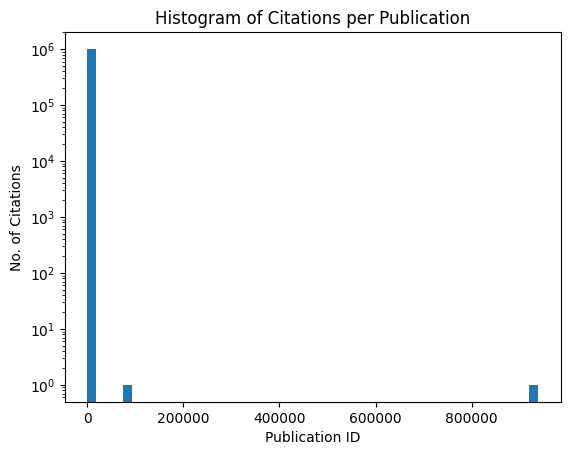

The publication with the largest number of references is:  2015217
The publication with the largest number of citations is:  2135000


In [15]:
import matplotlib.pyplot as plt
import numpy as np

references = {}
citations = {}
with open("./acm.txt","r", newline = "", encoding="utf8") as infile:
    for line in infile:
        if line.startswith("#index"):
            current_id = line[6:].strip()
        if line.startswith("#%"):
            ref_id = line[2:].strip()
            if ref_id != "":
                references[current_id] = references.get(current_id, 0) + 1
                citations[ref_id] = citations.get(ref_id, 0) + 1

# Now we will prepare the data to plot the histograms
ref_counts = list(references.values())
cit_counts = list(citations.values())

# Plotting the histogram for references
plt.hist(ref_counts, bins=50, log = True)
plt.xlabel('Publication ID')
plt.ylabel('No. of References')
plt.title('Histogram of References per Publication')
plt.show()

# Plotting the histogram for citations
plt.hist(cit_counts, bins=50, log = True)
plt.xlabel('Publication ID')
plt.ylabel('No. of Citations')
plt.title('Histogram of Citations per Publication')
plt.show()

# Finding the publication with the largest number of references
max_ref_pub = max(references, key=references.get)
print("The publication with the largest number of references is: ", max_ref_pub)

# Finding the publication with the largest number of citations
max_cit_pub = max(citations, key=citations.get)
print("The publication with the largest number of citations is: ", max_cit_pub)


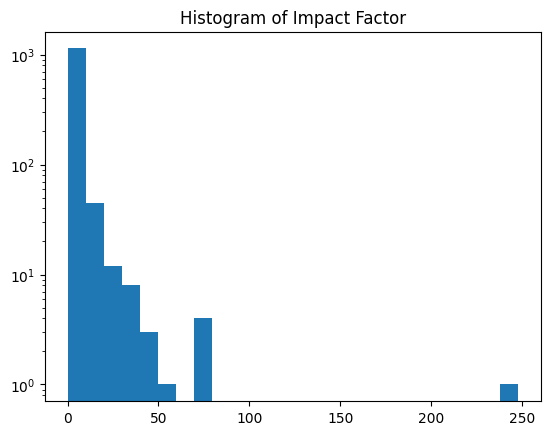

In [16]:
# G

venue_impact = {}
for ven in cite_venue_count.keys():   
    venue_impact[ven] = 0    
    if venue != 'None' and venues_pubs.get(ven) != None :
        venue_impact[ven] = cite_venue_count[ven]/venues_pubs[ven]
        
plt.title('Histogram of Impact Factor')
plt.hist(list(venue_impact.values()),bins=25,log= True)
plt.show()

In [17]:
# H 

list(venue_impact.keys())[list(venue_impact.values()).index(max(list(venue_impact.values())))]


'omputability with Pascal\n'

We shouldn't trust the impact factor 

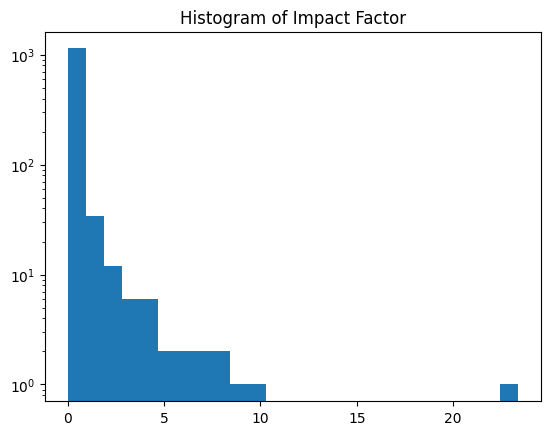

In [18]:
# I

venue_impact = {}
for ven in cite_venue_count.keys():   
    venue_impact[ven] = 0    
    if venue != 'None' and venues_pubs.get(ven) != None and venues_pubs[ven] > 10:
        venue_impact[ven] = cite_venue_count[ven]/venues_pubs[ven]
        
plt.title('Histogram of Impact Factor')
plt.hist(list(venue_impact.values()),bins=25,log= True)
plt.show()

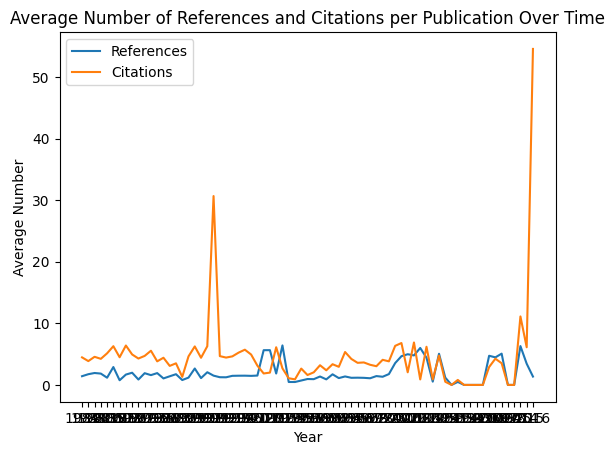

In [22]:
# J

# Dictionaries to store the references and citations
references = {}
citations = {}

# Default dictionary to store the publications for each year
publications_by_year = defaultdict(list)

# Read the file
with open("./acm.txt","r", newline = "", encoding="utf8") as infile:
    for line in infile:
        if line.startswith("#index"):
            current_id = line[6:].strip()
        if line.startswith("#%"):
            ref_id = line[2:].strip()
            if ref_id != "":
                references[current_id] = references.get(current_id, 0) + 1
                citations[ref_id] = citations.get(ref_id, 0) + 1
        if line.startswith("#t"):
            year = line[2:].strip()
            publications_by_year[year].append(current_id)

# Calculate the yearly averages of references and citations
avg_refs_by_year = {year: np.mean([references.get(pub_id, 0) for pub_id in pub_ids]) for year, pub_ids in publications_by_year.items()}
avg_cits_by_year = {year: np.mean([citations.get(pub_id, 0) for pub_id in pub_ids]) for year, pub_ids in publications_by_year.items()}

# Plot the average number of references per publication as a function of time
plt.plot(list(avg_refs_by_year.keys()), list(avg_refs_by_year.values()), label='References')
# Plot the average number of citations per publication as a function of time
plt.plot(list(avg_cits_by_year.keys()), list(avg_cits_by_year.values()), label='Citations')

plt.xlabel('Year')
plt.ylabel('Average Number')
plt.title('Average Number of References and Citations per Publication Over Time')
plt.legend()
plt.show()


The average number of references per publication has been decently steady each year, whereas the average number of citations increasead in specific peaks but as mostly stayed steady as well. 